# Regressie - intro

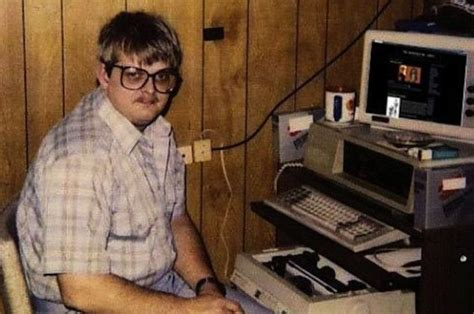

## Install

In [1]:
!pip3 install numpy
!pip3 install scipy

## Import

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as cp

## Predefine

In [2]:
def plot_init():
    
    fig, ax = plt.subplots()
    
    return ax


def plot_add(ax, x, y):
    
    ax.plot(x, y, linewidth=2.0)


def plot_show():
    
    plt.show()


def plot_graph(x, y):
    
    ax = plot_init()
    plot_add(ax, x, y)
    plot_show()

## Lineair verband
### Model
huizenprijs = vastgoed offset + prijs per oppervlak x oppervlak

p = 25.000 + 5.000 x oppervlak

### Stap 1: Maak huizenprijs model

In [131]:
# datapunten genereren
# x = aantal m2
# y = huizenprijs
# huizenprijs = 25000 + 5000 * oppervlak

def calculate_houseprice(n,f):
    m2 = np.arange(n,f)
    price = (25000 + 5000 * m2)
    price = np.random.normal(price, 5000)
    return m2, price

    
x,y = calculate_houseprice(50,250)





### Stap 2: Bekijk interval [50, 75] m2

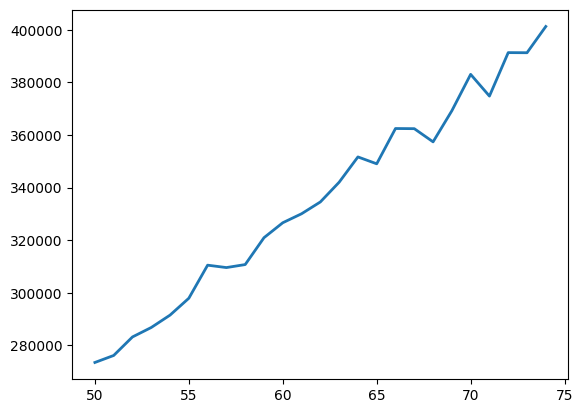

In [129]:
x75 = x[0:25]
y75 = y[0:25]

plot_graph(x75,y75)

### Stap 3: Fit data

#### Use the curve fitting

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

[ 5237.42654073 10792.58305565]


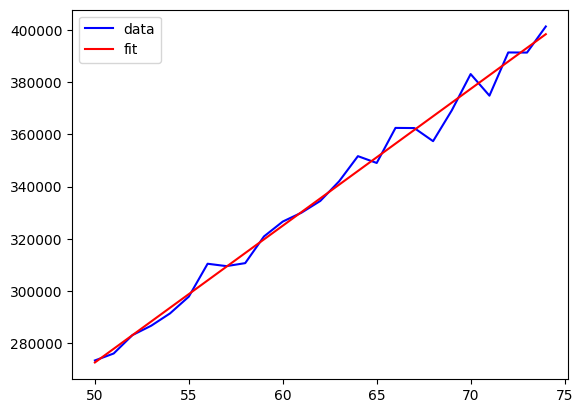

In [138]:
# curve_fit(f, x_data, y_data)

# Define our model

def f(x, a, b):
    return a * x + b


# Use scipy optimize package
popt, pcov = cp.optimize.curve_fit(f, x75, y75)
# Create fit
print(popt)
# Plot fit
plt.plot(x75, y75, 'b-', label="data")
plt.plot(x75, f(x75, *popt), 'r-', label="fit")
plt.legend()
plt.show()

### Stap 4: Extrapoleer

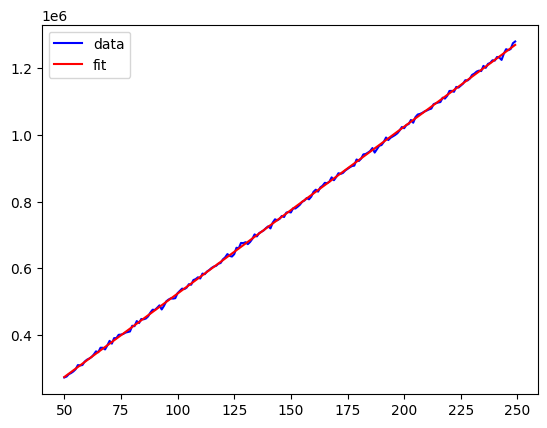

In [145]:
# Create fit

fit1, var1 = cp.optimize.curve_fit(f, x, y)

# Plot prediction for whole range

plt.plot(x, y, 'b-', label="data")
plt.plot(x, f(x, *fit1), 'r-', label="fit")
plt.legend()
plt.show()

## Polynomiale verbanden

### Model

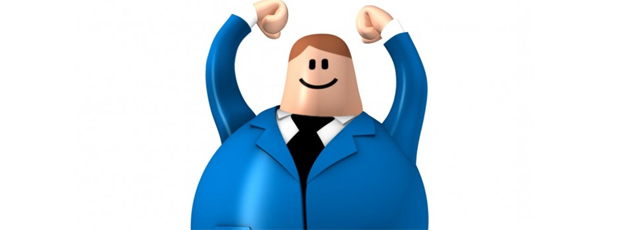

massa bolmannetje = dichtheid x bolvormigheid + benen + armen + hoofd

mass_bolman = 1.03 x radius^3 + 12.4 + 8.7 + 3.2

### Stap 1: Maak model bolmannetje

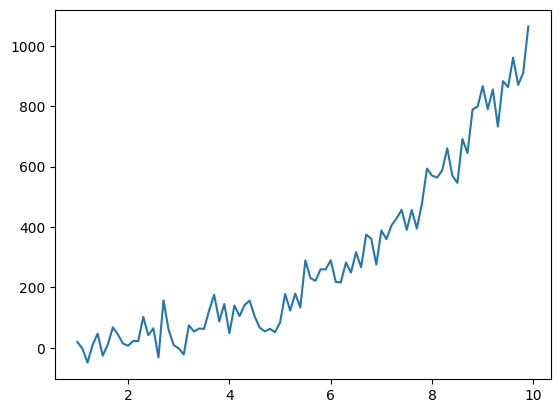

In [141]:
# mass_bolman = 1.03 * r^3 + 24.3

# variables
legs = 12.4
arms = 8.7
head = 3.2

# radius (x)
bolman_radius = np.arange(1, 10, 0.1)

# mass_bolman (y)
mass_bolman = 1.03 * (bolman_radius**3) + legs + arms + head

mass_bolman = np.random.normal(mass_bolman, 50)

plt.plot(bolman_radius, mass_bolman)

### Stap 2: Fit data

[ 1.01496246 20.03347217]


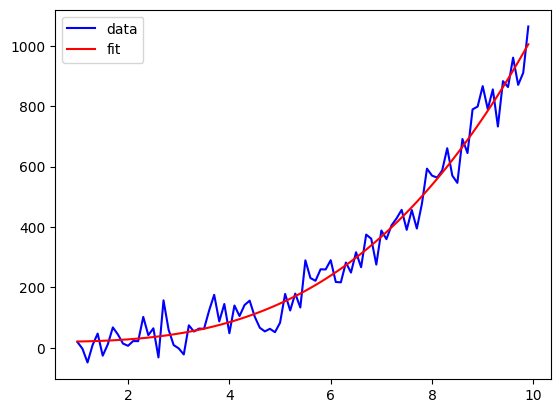

In [146]:
# Define our model
def b(x, a, b):
    return a * (x**3) + b
# Use scipy optimize package

fit, var = cp.optimize.curve_fit(b, bolman_radius, mass_bolman)

# Create fit

print(fit)

# Plot fit

plt.plot(bolman_radius, mass_bolman, 'b-', label="data")
plt.plot(bolman_radius, b(bolman_radius, *fit), 'r-', label="fit")
plt.legend()
plt.show()

## Combinatie periodiek en exponentieel verband

### Model

Finding Seasonal Trends in Time-Series Data

https://towardsdatascience.com/finding-seasonal-trends-in-time-series-data-with-python-ce10c37aa861